# Amooora Text Classification

Nesse notebook vamos explorar o modelo disponível no Huggingface [bert-base-therapist-topic-classification-eng](https://huggingface.co/AIPsy/bert-base-therapist-topic-classification-eng)

## Importing packages

In [ ]:
!pip install transformers

In [ ]:
!pip install --force-reinstall torch torchvision torchaudio transformers

  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2

In [ ]:
import pandas as pd
from transformers import pipeline

## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load entire Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/text_and_topics.csv', keep_default_na=False)
df.head()

,combined_preprocessed,answered_percent,text_length,topic_0_from_five,topic_1_from_five,topic_2_from_five,topic_3_from_five,topic_4_from_five,topic_0_from_two,topic_1_from_two
0,would love think kind intellectual either dumb...,100.0,1565,0.905500,0.023574,0.023639,0.023778,0.023509,0.271588,0.728412
1,chef mean workaholic love cook regardless whet...,60.0,815,0.027683,0.339134,0.027590,0.578125,0.027468,0.446532,0.553468
2,im ashamed much write public text online date ...,90.0,3728,0.914891,0.021284,0.021307,0.021207,0.021311,0.280111,0.719889
3,work library go school read thing write old de...,70.0,330,0.045781,0.045620,0.817402,0.045673,0.045524,0.330528,0.669472
4,hey hows go currently vague profile know come ...,50.0,496,0.031946,0.031976,0.872147,0.032119,0.031812,0.450953,0.549047


## Let's try out another model

In [ ]:
!pip install xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Load model from HuggingFace

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
model = AutoModelForSequenceClassification.from_pretrained(
    "WebOrganizer/TopicClassifier-NoURL",
    trust_remote_code=True,
    use_memory_efficient_attention=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("text-classification", model="WebOrganizer/TopicClassifier-NoURL", trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


### Get two text to try out

In [ ]:
text_one = df.iloc[0:2].combined_preprocessed

In [ ]:
text_one.values

array(['would love think kind intellectual either dumbest smart guy smartest dumb guy cant say tell difference love talk idea concept forge odd metaphor instead recite cliche like simularities friend mine house underwater salt mine favorite word salt way weird choice know thing life better metaphor seek make little better everyday productively lazy way get tire tie shoe consider hire five year old would probably tie shoe decide wear leather shoe dress shoe love really serious really deep conversation really silly stuff will snap light hearted rant kiss dont funny able make laugh able bend spoon mind telepathically make smile still work love life cool let wind blow extra point read guess favorite video game hint give yet lastly good attention span currently work international agent freight forward company import export domestic know work online class try better free time perhaps hour worth good book video game lazy sunday make people laugh rant good salt find simplicity complexity compl

### Call model to predict label

In [ ]:
inputs = tokenizer(list(text_one.values), return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)

probs = outputs.logits.softmax(dim=-1)
print(probs.argmax(dim=-1))

tensor([7, 7])


### Get label predicted

In [ ]:
label_id = probs.argmax(dim=-1)

In [ ]:
label_id.tolist()

[7, 7]

### Read model labels

In [ ]:
model.config.id2label

{0: 'Adult',
 1: 'Art & Design',
 10: 'Food & Dining',
 11: 'Games',
 12: 'Health',
 13: 'History',
 14: 'Home & Hobbies',
 15: 'Industrial',
 16: 'Literature',
 17: 'Politics',
 18: 'Religion',
 19: 'Science & Tech.',
 2: 'Software Dev.',
 20: 'Software',
 21: 'Sports & Fitness',
 22: 'Transportation',
 23: 'Travel',
 3: 'Crime & Law',
 4: 'Education & Jobs',
 5: 'Hardware',
 6: 'Entertainment',
 7: 'Social Life',
 8: 'Fashion & Beauty',
 9: 'Finance & Business'}

### Predicted label for one text

In [ ]:
model.config.id2label[label_id.item()]

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

In [ ]:
for lbl in label_id:
    print(model.config.id2label[lbl.item()])

Social Life
Social Life


### Predicting 300 texts

In [ ]:
%%time

three_hundred_texts = df.iloc[:300]
three_hundred_texts.shape

CPU times: user 179 µs, sys: 0 ns, total: 179 µs
Wall time: 183 µs


(300, 10)

In [ ]:
multiple_texts = three_hundred_texts.combined_preprocessed.values.tolist()

### Predicting all texts

criar funcao com os passos
e aplicar no for loop com iloc andando de chunksize em chunksize

Rodar O modelo e depois fazer um pca para criar menos topicos ao inves de 36


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# # Load tokenizer and model once (outside the loop to save memory)
# tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
# model = AutoModelForSequenceClassification.from_pretrained(
#     "WebOrganizer/TopicClassifier-NoURL",
#     trust_remote_code=True,
#     use_memory_efficient_attention=False
# )

device = "cuda" if torch.cuda.is_available() else "cpu"  # Check if GPU is available

tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
model = AutoModelForSequenceClassification.from_pretrained(
    "WebOrganizer/TopicClassifier-NoURL",
    trust_remote_code=True,
    use_memory_efficient_attention=False
).to(device)  # Move model to GPU

In [ ]:
def compute_labels(texts):
    """Return the predicted label for multiple texts."""

    # Tokenization with padding/truncation and move tensors to GPU
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move input tensors to GPU

    # Run model
    with torch.no_grad():  # Disable gradient calculation for inference (saves memory)
        outputs = model(**inputs)

    # Convert to probabilities
    probs = outputs.logits.softmax(dim=-1)

    # Get predicted labels
    predicted_labels = probs.argmax(dim=-1).tolist()
    print(predicted_labels)
    return predicted_labels


In [ ]:
%%time
# Load dataset in chunks
chunk_size = 300
chunks = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/text_and_topics.csv',
    keep_default_na=False,
    chunksize=chunk_size)

# Store predictions
predictions = []

for chunk in chunks:
    texts = chunk["combined_preprocessed"].values.tolist()
    chunk_predictions = compute_labels(texts)
    predictions.extend(chunk_predictions)

[7, 7, 7, 6, 7, 7, 16, 7, 7, 7, 7, 7, 0, 14, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 23, 7, 7, 7, 7, 7, 6, 7, 7, 7, 16, 7, 0, 7, 7, 14, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 14, 7, 7, 7, 16, 6, 7, 7, 4, 7, 7, 7, 6, 7, 7, 7, 14, 7, 7, 7, 14, 7, 7, 7, 7, 7, 8, 7, 0, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 7, 16, 7, 7, 7, 7, 7, 6, 7, 0, 11, 7, 7, 7, 0, 7, 7, 18, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 7, 0, 7, 7, 7, 7, 10, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 10, 7, 7, 7, 23, 7, 7, 7, 7, 7, 14, 7, 7, 7, 7, 7, 7, 7, 12, 7, 7, 14, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 16, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 14, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 16, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 16, 7, 7, 7, 7, 7]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7

### Saving to CSV

In [ ]:
# label | real_label

In [ ]:
topic_no_url_preds = pd.DataFrame({'label': predictions})

In [ ]:
topic_no_url_preds['real_label'] = topic_no_url_preds.label.apply(lambda x: model.config.id2label[x])

In [ ]:
topic_no_url_preds.to_csv('/content/drive/MyDrive/Colab Notebooks/amooora/raw_data/topic_no_url.csv', index=False, columns=topic_no_url_preds.columns)

## Labels distributions

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
label_counts = topic_no_url_preds.iloc[:, 0].value_counts()
label_counts

,count
label,
7,49732
6,2811
14,2363
16,1905
0,1018
4,466
1,309
10,240
21,232


<ipython-input-21-6e4b6262d76d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


<Axes: xlabel='label'>

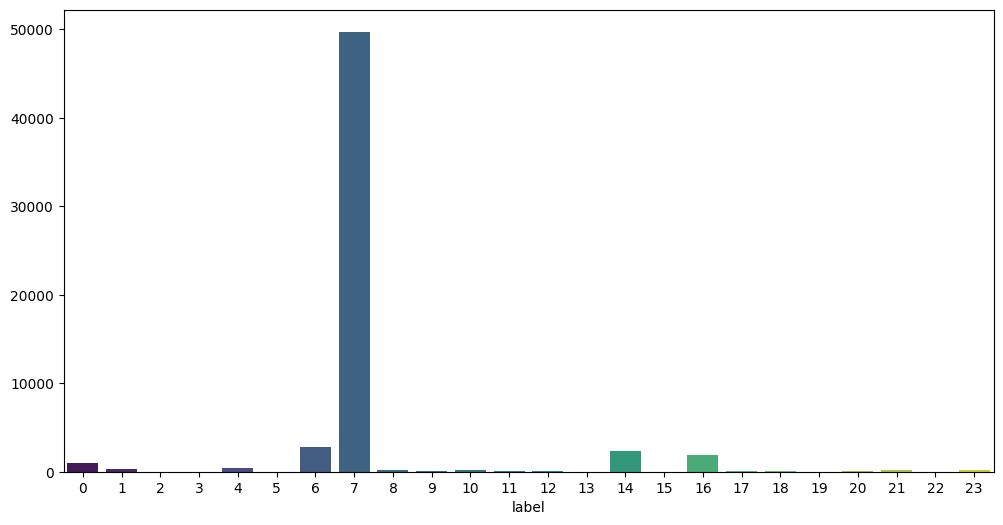

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

In [ ]:
model.config.id2label

{0: 'Adult',
 1: 'Art & Design',
 10: 'Food & Dining',
 11: 'Games',
 12: 'Health',
 13: 'History',
 14: 'Home & Hobbies',
 15: 'Industrial',
 16: 'Literature',
 17: 'Politics',
 18: 'Religion',
 19: 'Science & Tech.',
 2: 'Software Dev.',
 20: 'Software',
 21: 'Sports & Fitness',
 22: 'Transportation',
 23: 'Travel',
 3: 'Crime & Law',
 4: 'Education & Jobs',
 5: 'Hardware',
 6: 'Entertainment',
 7: 'Social Life',
 8: 'Fashion & Beauty',
 9: 'Finance & Business'}

### Testing Gepeto solution to not overload memory

In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# device = "cuda" if torch.cuda.is_available() else "cpu"  # Check if GPU is available

# tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
# model = AutoModelForSequenceClassification.from_pretrained(
#     "WebOrganizer/TopicClassifier-NoURL",
#     trust_remote_code=True,
#     use_memory_efficient_attention=False
# ).to(device)  # Move model to GPU

# # Example batch of texts
# texts = df.combined_preprocessed.values.tolist()

# # Tokenization with padding/truncation and move tensors to GPU
# inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
# inputs = {k: v.to(device) for k, v in inputs.items()}  # Move input tensors to GPU

# # Run model
# with torch.no_grad():  # Disable gradient calculation for inference (saves memory)
#     outputs = model(**inputs)

# # Convert to probabilities
# probs = outputs.logits.softmax(dim=-1)

# # Get predicted labels
# predicted_labels = probs.argmax(dim=-1).tolist()
# print(predicted_labels)


OutOfMemoryError: CUDA out of memory. Tried to allocate 38.45 GiB. GPU 0 has a total capacity of 14.74 GiB of which 12.44 GiB is free. Process 109712 has 2.30 GiB memory in use. Of the allocated memory 1.34 GiB is allocated by PyTorch, and 849.77 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)